<div style="width: 400px; height: 160px;">
    <img src="rplogo_small.png" width="100%" height="100%" align="left">
</div>

###     TIPP - AAI Assignement (Deep Learning Fundamentals)<br>Due Date: 21 February 2020
###     Submitted By: <u>KOAY</u> SENG TIAN<br>Email: sengtian@yahoo.com


In [1]:
# TIPP - AAI Assignment (Deep Learning Fundamentals)
# Date Due: 21February 2020
# Submited By: KOAY SENG TIAN
# Email: sengtian@yahoo.com
#
# GitHub: https://github.com/koayst/rp_deeplearning_assignment
#
# Note: source of below statement => sonar.names
# https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29
# Gorman and Sejnowski further report that a nearest neighbor classifier on
# the same data gave an 82.7% probability of correct classification.

from keras import models
from keras import layers
from keras import losses
from keras.layers.advanced_activations import LeakyReLU, ELU

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import os
import pandas as pd

pd.set_option('display.max_rows', 210)

# for reproducibility
np.random.seed(1337)

Using TensorFlow backend.


In [2]:
def load_data():
    filedir = os.path.join(os.getcwd(), 'data')
    mines_filename = 'sonar.mines'
    rocks_filename = 'sonar.rocks'
    sonar_filename = 'sonar.all-data'

    # load the data file
    file = os.path.join(filedir, sonar_filename)
    df = pd.read_csv(file, sep=',', header=None)
    
    # create the header for the dataframe
    # the header starts with 'ANG' followed by a number
    header = [f"ANG{x:02d}" for x in range(0, df.shape[1])]
    df.columns = header
    
    return df

In [3]:
def exploratory_data_analysis(df):
    print('Any null ?', end=' ')
    print(df.isnull().values.any())
    print()
    print('NULL count in each column:')
    print(df.isnull().sum())
    print()
    print('Any NaN ?', end=' ')
    print(sonar_df.isna().any().any())
    print()
    print('ZERO count in each column:')
    # columns 42 to 59 have 0 values, but it is still OK
    # as the document said 'each pattern is a set of 60 
    # numbers in the range 0.0 to 1.0 [sonar.names]
    print(df.eq(0).sum())
    print()
    
    # True if the dtype is object (categorical), otherwise False
    mask = sonar_df.dtypes == np.object
    # Extract column names that are categorical
    categorical_cols = sonar_df.columns[mask]
    print('What are the categorical column(s)?', end=' ')
    print(categorical_cols)
    print()
   
    # Extract categorical data
    categorical_data = sonar_df.select_dtypes(include=['object']).copy()
    
    # Count the number of cateory for each column
    print('Unique value count of categorical columns:')
    unique_values_counts = (categorical_data.apply(lambda x: x.nunique()).sort_values(ascending=False))
    print(unique_values_counts)
    print()
    
    print('Unique value of categorical columns:')
    print(categorical_data.apply(pd.Series.value_counts))

In [4]:
def charts(df):
    df.plot.box(figsize=(12,7))
    plt.xticks(np.arange(0, 61, 5.0), [f"ANG{x:02d}" for x in range(0, 61, 5)], rotation=45)
    plt.title('Boxplot for all 60 Angles')
    plt.show()
    

In [5]:
sonar_df = load_data()
sonar_df.shape

# print(sonar_df.head())
# print(sonar_df.tail())
# print(sonar_df.info())

# charts(sonar_df)

(208, 61)

In [6]:
# exploratory_data_analysis(sonar_df)


In [7]:
X = sonar_df.loc[:, sonar_df.columns != 'ANG60'].copy()
y = sonar_df.loc[:, 'ANG60'].copy()


In [8]:
# perform label encoding on Y
lbl_encoder = LabelEncoder()
y_encoded = lbl_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)

# standard scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform (X_test)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
# build the Artifical Neuro Network
network = models.Sequential()
network.add(layers.Dense(49, activation='relu', input_shape=(60,)))
network.add(layers.Dense(38, activation='relu'))
network.add(layers.Dense(23, activation='relu'))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [10]:
network.summary()

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 49)                2989      
_________________________________________________________________
dense_2 (Dense)              (None, 38)                1900      
_________________________________________________________________
dense_3 (Dense)              (None, 23)                897       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 192       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 5,987
Trainable params: 5,987
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history = network.fit(X_train, y_train, validation_split=0.2, epochs=13, batch_size=20, shuffle=True, verbose=1)

print()
test_loss, test_acc = network.evaluate(X_test, y_test)

print()
print('test_acc:', test_acc)




Train on 132 samples, validate on 34 samples
Epoch 1/13





132/132 [==============================] - 0s 3ms/step - loss: 0.6669 - acc: 0.6212 - val_loss: 0.6339 - val_acc: 0.6765
Epoch 2/13
132/132 [==============================] - 0s 106us/step - loss: 0.5975 - acc: 0.7348 - val_loss: 0.6130 - val_acc: 0.6765
Epoch 3/13
132/132 [==============================] - 0s 121us/step - loss: 0.5651 - acc: 0.7803 - val_loss: 0.5958 - val_acc: 0.7059
Epoch 4/13
132/132 [==============================] - 0s 151us/step - loss: 0.5321 - acc: 0.7879 - val_loss: 0.5775 - val_acc: 0.7059
Epoch 5/13
132/132 [==============================] - 0s 152us/step - loss: 0.5040 - acc: 0.8333 - val_loss: 0.5620 - val_acc: 0.7647
Epoch 6/13
132/132 [==============================] - 0s 151us/step - loss: 0.4661 - acc: 0.8712 - val_loss: 0.5426 - val_acc: 0.7941
Epoch 7/13
132/132 [==============================] - 0s 151us/step - loss: 0.4245 - acc: 0.9015 - val_loss: 0.5182 - val_acc: 0.7647
Epoch 8/13


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

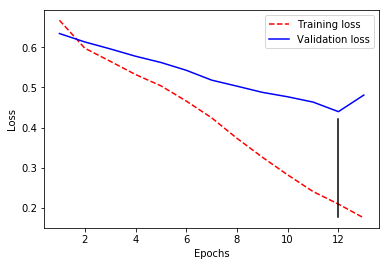

In [19]:
#draw a chart to show validation vs training losses

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure(figsize=(6,4))
plt.plot(epochs, loss_values, 'r--', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.axvline(x=12, ymin=0.05, ymax=0.5, color='black')

plt.legend()
plt.show()

In [13]:
# from the above chart, the ideal Epochs is around 12 before overfitting starts to happen
# from the above, the test accuracy is 88%